In [1]:
# !/usr/bin/python3 -m pip install ipykernel -U --user --force-reinstall

In [30]:
# !pip3 install pyvis
!pip3 install bokeh
!pip3 install pandas
!pip3 install tqdm
!pip3 install networkx
!pip3 install requests
!pip3 install matplotlib


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\13105\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\13105\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\13105\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\13105\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\13105\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.2/7.2 MB 8.9 MB/s eta 0:00:00
     ---------------------------------------- 163.6/163.6 kB ? eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 30.8 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\13105\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import re
import html
from urllib import parse
import requests
import networkx
from bokeh.io import output_notebook, show, save
output_notebook()
# from pyvis.network import Network

Loading BokehJS ...

In [17]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

In [18]:
from utils import *

In [19]:
node_attributes = ['user_id', 'public', 'completion_percentage', 'gender', 'region', 'last_login', 'registration', 'AGE', 'body', 'I_am_working_in_field', 'spoken_languages', 'hobbies', 'I_most_enjoy_good_food', 'pets', 'body_type', 'my_eyesight', 'eye_color', 'hair_color', 'hair_type', 'completed_level_of_education', 'favourite_color', 'relation_to_smoking', 'relation_to_alcohol', 'sign_in_zodiac', 'on_pokec_i_am_looking_for', 'love_is_for_me', 'relation_to_casual_sex', 'my_partner_should_be', 'marital_status', 'children', 'relation_to_children', 'I_like_movies', 'I_like_watching_movie', 'I_like_music', 'I_mostly_like_listening_to_music', 'the_idea_of_good_evening', 'I_like_specialties_from_kitchen', 'fun', 'I_am_going_to_concerts', 'my_active_sports', 'my_passive_sports', 'profession', 'I_like_books', 'life_style', 'music', 'cars', 'politics', 'relationships', 'art_culture', 'hobbies_interests', 'science_technologies', 'computers_internet', 'education', 'sport', 'movies', 'travelling', 'health', 'companies_brands', 'more']

In [20]:
vis_attributes = ['user_id', 'public', 'completion_percentage', 'gender', 'region', 'last_login', 'registration', 'AGE', 'body', 'I_am_working_in_field', 'spoken_languages', 'hobbies']

In [21]:
def load_from_csv(path):
    df = pd.read_csv(path)
    return df

def row_to_dict(row, attr):
    data = {}
    for a in attr:
        data[a] = row[a]
    return data

In [22]:
def load_missing():
    with open('./missing_users.txt') as f:
        lines = f.readlines()
    lst = [int(l.replace('\n', '')) for l in lines]
    return lst

missing = load_missing()

In [23]:
df = pd.read_csv('./toy_example_500.csv')
net = create_network(df, vis_attributes, 50, missing)

In [24]:
import copy
def get_subgraph(graph, nodes):
    
    # graph: oroginal graph
    # nodes: a list of node indices in subgraph
    
    subgraph = copy.copy(graph)
    origin_nodes = graph.nodes
    to_remove = [n for n in origin_nodes if n not in nodes]
    subgraph.remove_nodes_from(to_remove)
    return subgraph

In [25]:
g = get_subgraph(net, [1,2,3,5,7])

In [26]:
g.nodes

NodeView((1, 3, 5, 7, 2))

In [ ]:
pos = networkx.spring_layout(net)
pos
# for n in net.nodes():
#     print(n)    
#     print(net[n]['pos'])
#     break

In [9]:
print(net.nodes) # node id
net.nodes[31]

[1, 13, 11, 6, 3, 4, 5, 15, 14, 7, 8, 12, 9, 10, 16, 2, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 17]


{'user_id': 31,
 'public': 1,
 'completion_percentage': 62,
 'gender': 1,
 'region': 'Zilina Region, Kysucke New Town',
 'last_login': '2012-02-18 13:20:00.0',
 'registration': '2007-01-01 00:00:00.0',
 'AGE': 24,
 'body': '170 cm, 75 kg',
 'I_am_working_in_field': nan,
 'spoken_languages': 'German, Slovak, Czech, but preferably your own',
 'hobbies': 'playing sports, hiking, working around the house, working with a computer, cooking, friends, sleeping, sex, camping, .............'}

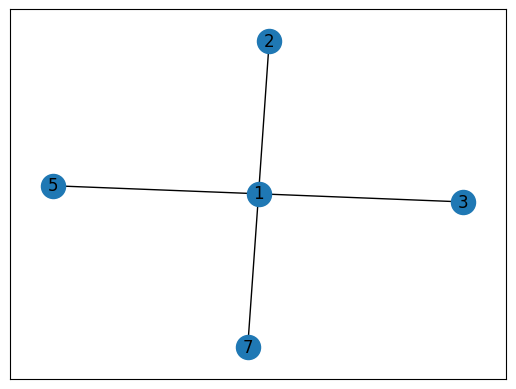

In [37]:
import matplotlib.pyplot as plt
networkx.draw_networkx(g)
plt.savefig('test.png')

In [ ]:
def visualization(graph, vis_attr):
    title = 'Testing Network'

    HOVER_TOOLTIPS = [(p, "@"+p) for p in vis_attributes]
    plot = figure(tooltips = HOVER_TOOLTIPS,
                  tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
                x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

    network_graph = from_networkx(g, networkx.spring_layout, scale=10, center=(0, 0))

    offset = [[], []]

    # for n in network_graph.nodes():
    #     x, y = network_graph.nodes[n]['pos']
    #     offset[0].append(x)
    #     offset[1].append(y)

    # for o in offset:

    #Set node size and color
    network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

    #Set edge opacity and width
    network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)
    plot.renderers.append(network_graph)
    show(plot)

In [27]:
title = 'Testing Network'

HOVER_TOOLTIPS = [(p, "@"+p) for p in vis_attributes]
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

network_graph = from_networkx(g, networkx.spring_layout, scale=10, center=(0, 0))

offset = [[], []]

# for n in network_graph.nodes():
#     x, y = network_graph.nodes[n]['pos']
#     offset[0].append(x)
#     offset[1].append(y)

# for o in offset:
  
#Set node size and color
network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)
plot.renderers.append(network_graph)
show(plot)